In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Import data

In [147]:
df = pd.read_csv('loan_sanction_train.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [148]:
df.shape

(614, 13)

In [149]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [150]:
df = df.dropna()
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### Data Visualization 

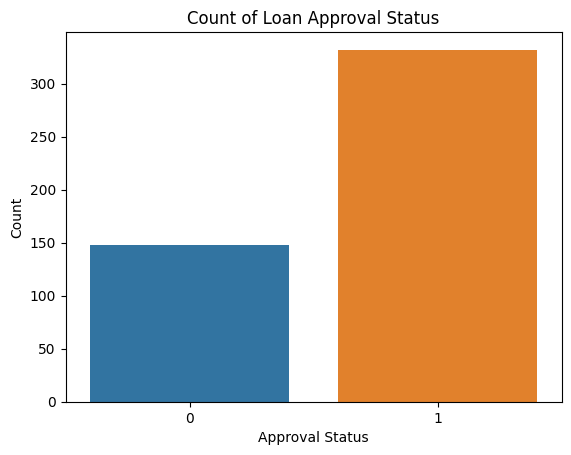

In [193]:
sns.countplot(x='Loan_Status', data=df)
plt.xlabel('Approval Status')
plt.ylabel('Count')
plt.title('Count of Loan Approval Status')
plt.show()

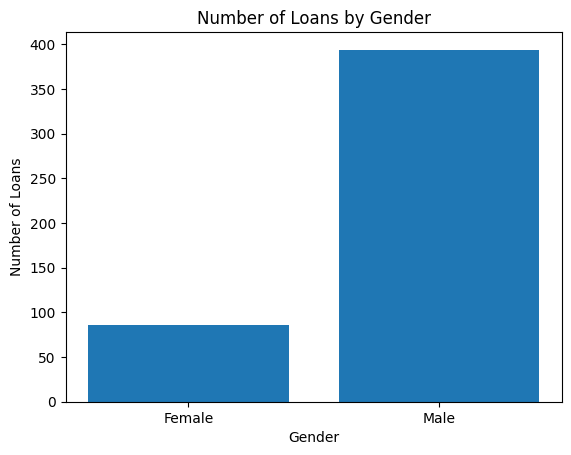

In [151]:
gender_counts = df.groupby('Gender')['Loan_Status'].count()

plt.bar(gender_counts.index, gender_counts.values)
plt.title("Number of Loans by Gender")
plt.xlabel("Gender")
plt.ylabel("Number of Loans")
plt.show()

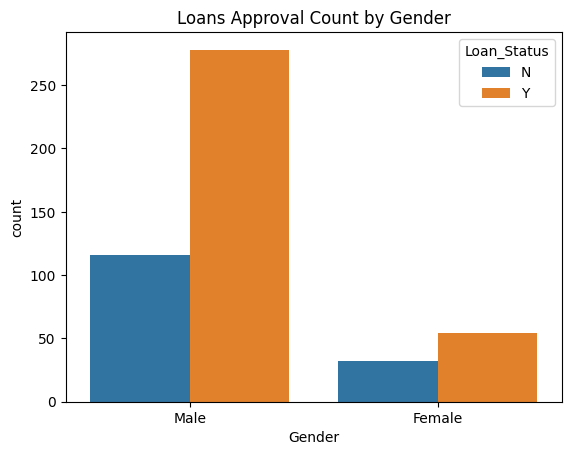

In [152]:
sns.countplot(x='Gender', hue='Loan_Status', data=df)
plt.title("Loans Approval Count by Gender")
plt.show()

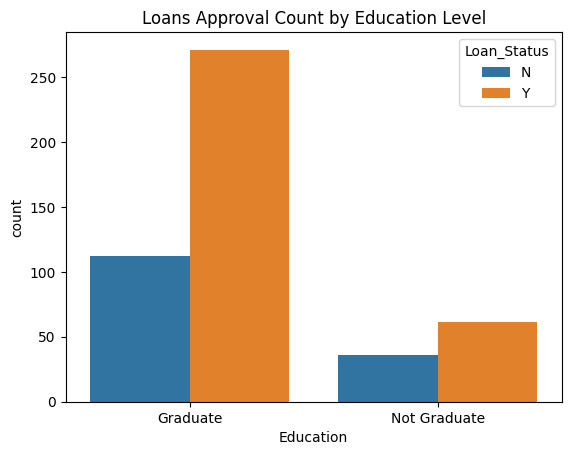

In [153]:
sns.countplot(x='Education', hue='Loan_Status', data=df)
plt.title("Loans Approval Count by Education Level")
plt.show()

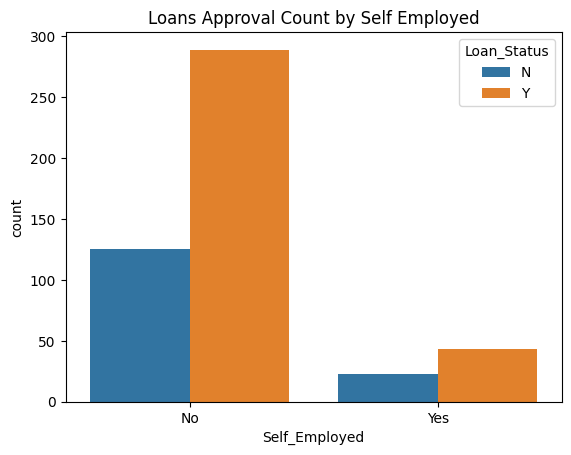

In [154]:
sns.countplot(x='Self_Employed', hue='Loan_Status', data=df)
plt.title("Loans Approval Count by Self Employed")
plt.show()

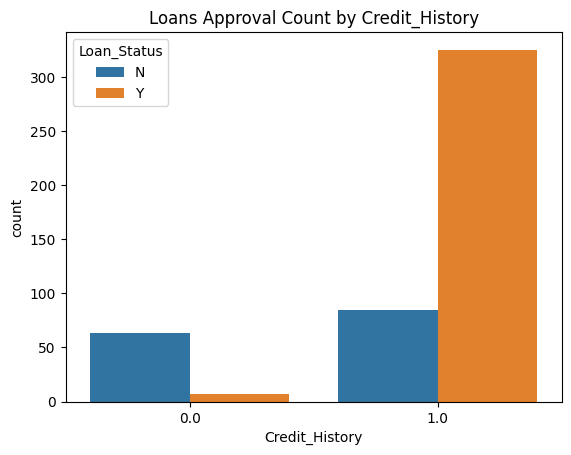

In [155]:
sns.countplot(x='Credit_History', hue='Loan_Status', data=df)
plt.title("Loans Approval Count by Credit_History")
plt.show()


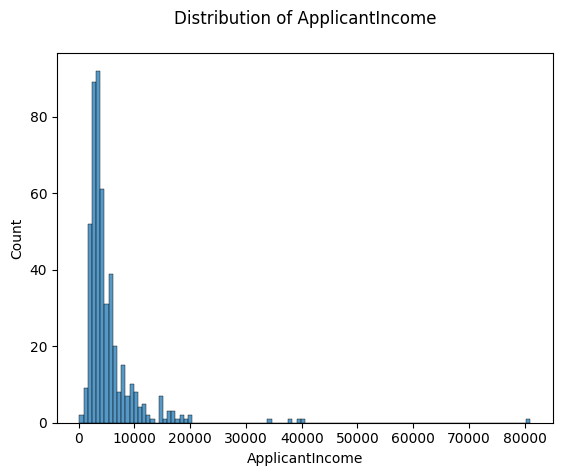

In [156]:
plt.title('Distribution of ApplicantIncome\n')
sns.histplot(df.loc[:, 'ApplicantIncome'])
plt.show()

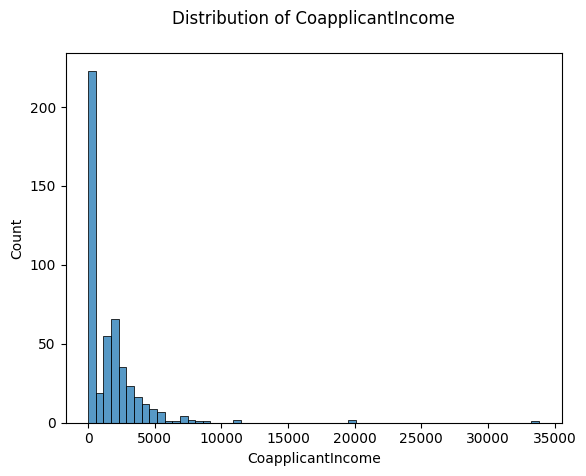

In [157]:
plt.title('Distribution of CoapplicantIncome\n')
sns.histplot(df.loc[:, 'CoapplicantIncome'])
plt.show()

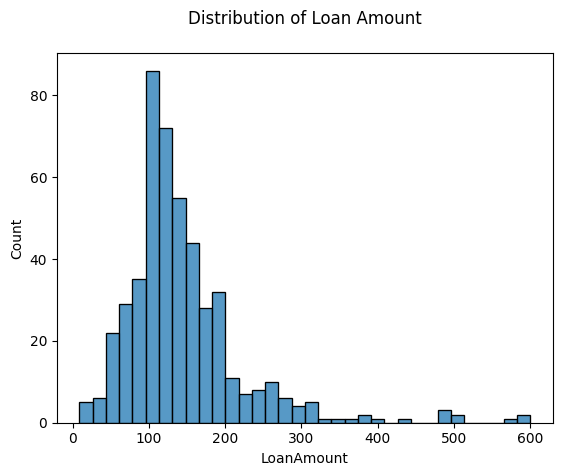

In [158]:
plt.title('Distribution of Loan Amount\n')
sns.histplot(df.loc[:, 'LoanAmount'])
plt.show()

### Feature Engineering 

Normalization 

In [159]:
# put ApplicantIncome and CoapplicantIncome togather because CoapplicantIncome may be 0 
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']

In [160]:
df['TotalIncome'] = np.log(df['TotalIncome'])
df['LoanAmount'] = np.log(df['LoanAmount'])

Plot distribution after normorlization

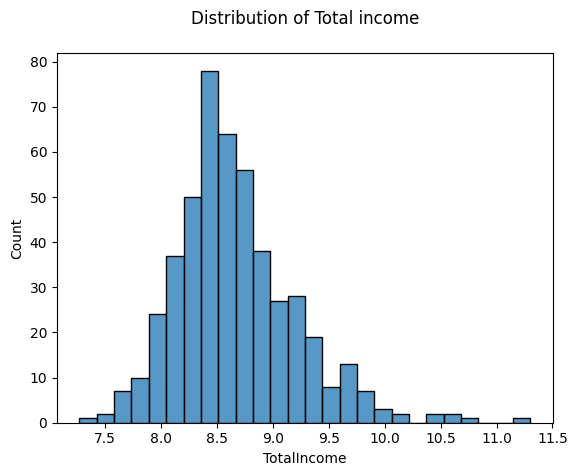

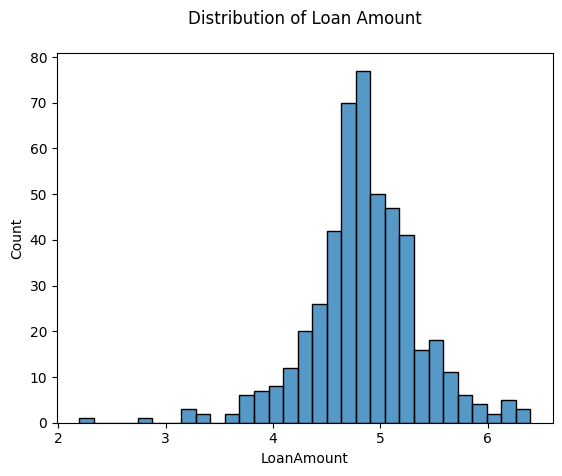

In [161]:
plt.title('Distribution of Total income\n')
sns.histplot(df.loc[:, 'TotalIncome'])
plt.show()

plt.title('Distribution of Loan Amount\n')
sns.histplot(df.loc[:, 'LoanAmount'])
plt.show()

In [162]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,4.852030,360.0,1.0,Rural,N,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,4.189655,360.0,1.0,Urban,Y,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,4.787492,360.0,1.0,Urban,Y,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,4.948760,360.0,1.0,Urban,Y,8.699515
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,5.587249,360.0,1.0,Urban,Y,9.170872


In [163]:
# drop unnecessary colomns
df = df.drop('Loan_ID', axis=1)
df = df.drop('ApplicantIncome', axis=1)
df = df.drop('CoapplicantIncome', axis=1)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
1,Male,Yes,1,Graduate,No,4.852030,360.0,1.0,Rural,N,8.714568
2,Male,Yes,0,Graduate,Yes,4.189655,360.0,1.0,Urban,Y,8.006368
3,Male,Yes,0,Not Graduate,No,4.787492,360.0,1.0,Urban,Y,8.505323
4,Male,No,0,Graduate,No,4.948760,360.0,1.0,Urban,Y,8.699515
5,Male,Yes,2,Graduate,Yes,5.587249,360.0,1.0,Urban,Y,9.170872


In [164]:
# change string values to numerical values
df['Gender'] = df['Gender'].replace({'Male': 1, 'Female': 0})
df['Married'] = df['Married'].replace({'Yes':1, 'No':0})
df['Self_Employed'] = df['Self_Employed'].replace({'Yes':1, 'No':0})
df['Education'] = df['Education'].replace({'Graduate':1, 'Not Graduate':0})
df['Loan_Status'] = df['Loan_Status'].replace({'Y':1, 'N':0})
df['Dependents'] = df['Dependents'].replace({'0': 0, '1':1, '2':2, '3+':3})

df.head()


,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
1,1,1,1,1,0,4.852030,360.0,1.0,Rural,0,8.714568
2,1,1,0,1,1,4.189655,360.0,1.0,Urban,1,8.006368
3,1,1,0,0,0,4.787492,360.0,1.0,Urban,1,8.505323
4,1,0,0,1,0,4.948760,360.0,1.0,Urban,1,8.699515
5,1,1,2,1,1,5.587249,360.0,1.0,Urban,1,9.170872


In [165]:
hot_encoded_area = pd.get_dummies(df['Property_Area'])
df = pd.concat([df, hot_encoded_area], axis=1)
df = df.drop('Property_Area', axis=1)

df.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,TotalIncome,Rural,Semiurban,Urban
1,1,1,1,1,0,4.852030,360.0,1.0,0,8.714568,1,0,0
2,1,1,0,1,1,4.189655,360.0,1.0,1,8.006368,0,0,1
3,1,1,0,0,0,4.787492,360.0,1.0,1,8.505323,0,0,1
4,1,0,0,1,0,4.948760,360.0,1.0,1,8.699515,0,0,1
5,1,1,2,1,1,5.587249,360.0,1.0,1,9.170872,0,0,1


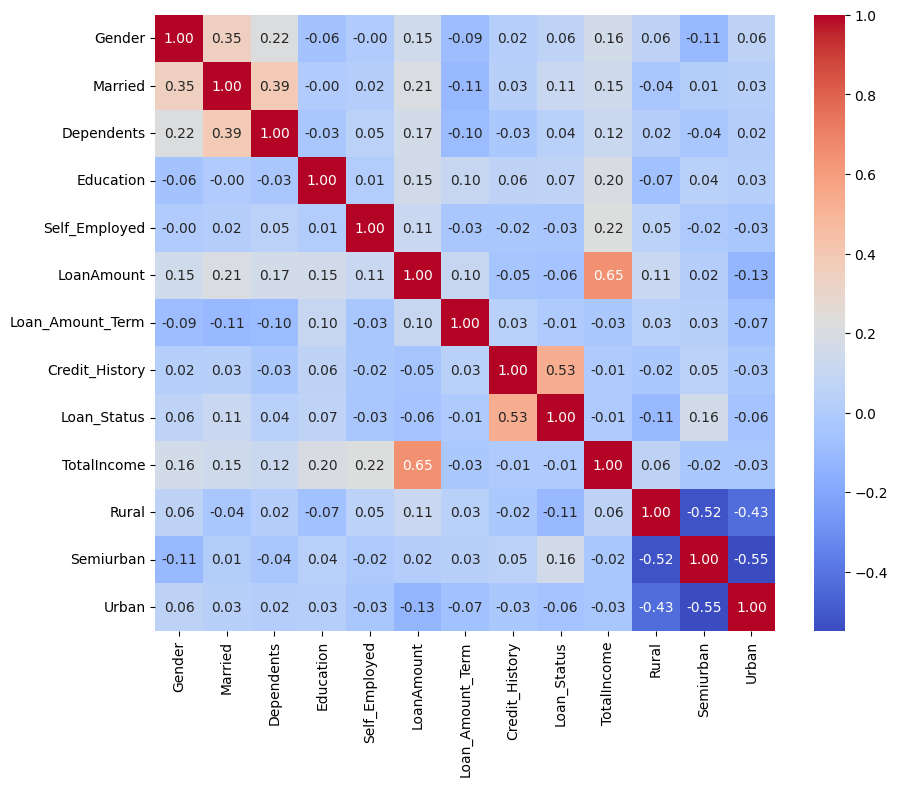

In [166]:
corr_matrix = df.corr()

fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt='.2f')
plt.show()

In [167]:
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

In [168]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [169]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

### Logistic Regression

<Axes: >

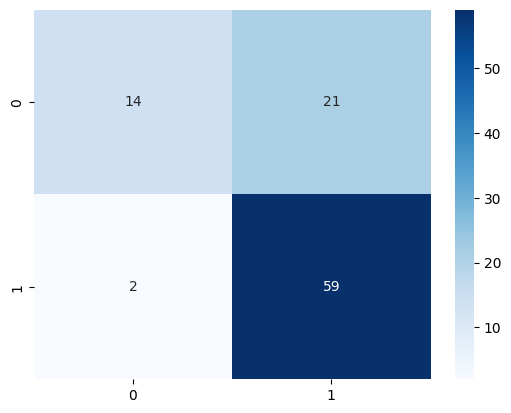

In [196]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
lr = LogisticRegression(random_state=0)

lr.fit(X_train, y_train)
lr_y_pred_train = lr.predict(X_train)
lr_y_pred = lr.predict(X_test)

cm = confusion_matrix(y_test, lr_y_pred)
sns.heatmap(cm, annot=True, cmap="Blues")

In [197]:
from sklearn.metrics import classification_report
print('Logistic Regression Report:')
print(classification_report(y_test, lr_y_pred))
print(f'Accuracy Score (Train): {lr.score(X_train, y_train)}')
print(f'Accuracy Score (Test): {lr.score(X_test, y_test)}')

Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.88      0.40      0.55        35
           1       0.74      0.97      0.84        61

    accuracy                           0.76        96
   macro avg       0.81      0.68      0.69        96
weighted avg       0.79      0.76      0.73        96

Accuracy Score (Train): 0.8203125
Accuracy Score (Test): 0.7604166666666666


### Naive Bayes

<Axes: >

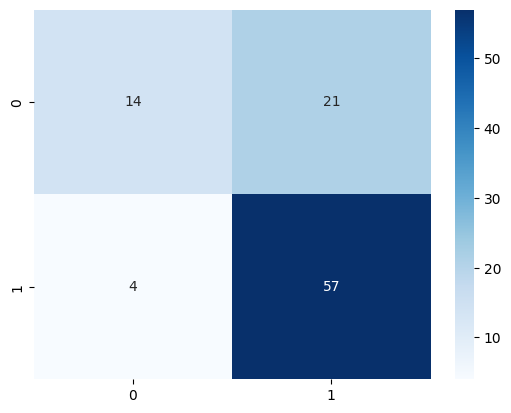

In [201]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

nb_y_pred_train = nb.predict(X_train)
nb_y_pred = nb.predict(X_test)

cm2 = confusion_matrix(y_test, nb_y_pred)
sns.heatmap(cm2, annot=True, cmap="Blues")

In [202]:
from sklearn.metrics import classification_report
print('Naive Bayes Report:')
print(classification_report(y_test, nb_y_pred))
print(f'Accuracy Score (Train): {nb.score(X_train, y_train)}')
print(f'Accuracy Score (Test): {nb.score(X_test, y_test)}')

Naive Bayes Report:
              precision    recall  f1-score   support

           0       0.78      0.40      0.53        35
           1       0.73      0.93      0.82        61

    accuracy                           0.74        96
   macro avg       0.75      0.67      0.67        96
weighted avg       0.75      0.74      0.71        96

Accuracy Score (Train): 0.828125
Accuracy Score (Test): 0.7395833333333334


### RandomForest

Random Forest Report:
              precision    recall  f1-score   support

           0       0.80      0.46      0.58        35
           1       0.75      0.93      0.83        61

    accuracy                           0.76        96
   macro avg       0.78      0.70      0.71        96
weighted avg       0.77      0.76      0.74        96

Accuracy Score (Train): 0.9401041666666666
Accuracy Score (Test): 0.7604166666666666


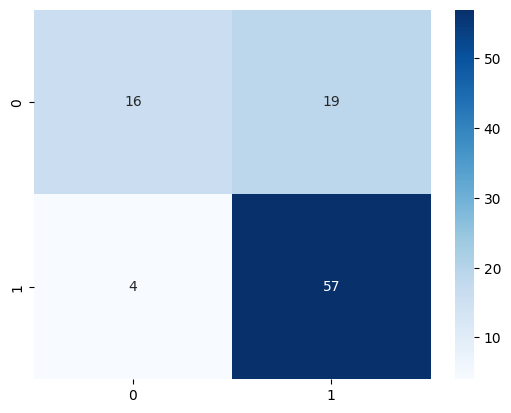

In [206]:
#building model 1 with random forest classifier and predict labels
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=600, max_depth=10)
rf.fit(X_train,y_train)

rf_y_pred_train = rf.predict(X_train)
rf_y_pred = rf.predict(X_test)

cm3 = confusion_matrix(y_test, rf_y_pred)
sns.heatmap(cm3, annot=True, cmap="Blues")

print('Random Forest Report:')
print(classification_report(y_test, rf_y_pred))
print(f'Accuracy Score (Train): {rf.score(X_train, y_train)}')
print(f'Accuracy Score (Test): {rf.score(X_test, y_test)}')